In [1]:
# For using package modified in local repo 
using Pkg

push!(LOAD_PATH, "C://Users//jerem//OneDrive//Desktop//GitHub//Code//FinalCode")

4-element Array{String,1}:
 "@"
 "@v#.#"
 "@stdlib"
 "C://Users//jerem//OneDrive//Desktop//GitHub//Code//FinalCode"

In [2]:
using ForwardDiff, Plots, Statistics, LinearAlgebra, OnlineStats, Distributions, Random, CUDA, CSV, DataFrames

using Sofia, Amlet, Geraldine 

using LaTeXStrings

# Backend
gr()

┌ Info: Precompiling Geraldine [c0fffcf4-b2fb-46e8-8a34-03ca56aefa66]
└ @ Base loading.jl:1278
  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken fo

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** i

┌ Warning: Package Geraldine does not have Pkg in its dependencies:
│ - If you have Geraldine checked out for development and have
│   added Pkg as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with Geraldine
└ Loading Pkg into Geraldine from project dependency, future warnings for Geraldine are suppressed.
  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **

  ** incremental compilation may be fatally broken for this module **



Plots.GRBackend()

In [3]:
function plotting_with_CI(all_f::AbstractArray, mo::AbstractStochasticModel, param::AbstractArray, 
                            sampleSizes::AbstractArray{Int, 1}, 
                            label::String, 
                            level::Float64 = 0.95 )
    p = plot(all_f, xlabel=string("Iteration ", "k"), ylabel="f_Nk", label=label)
    nbIter = length(all_f)
    z_α = quantile(Normal(), level)
    l_CI = []
    h_CI = []
    sigmaCI = []
    for i in 1:nbIter
        N = sampleSizes[i]
        fH = all_f[i]
        
        fs = Amlet.Fs(param[i], mo, sample=1:Nobs(mo))
        sigmaH = std(fs, mean = fH, corrected = false)        

        lH = fH - z_α*sigmaH/sqrt(N)
        sH = fH + z_α*sigmaH/sqrt(N)
        append!(l_CI, lH)
        append!(h_CI , sH)
        append!(sigmaCI, sigmaH)
    end
    plot!(p, l_CI, line=:dash, label = string(label, " l_CI"))
    plot!(p, h_CI, line=:dash, label =  string(label, " h_CI"))
    return p, l_CI, h_CI, sigmaCI
end

plotting_with_CI (generic function with 2 methods)

In [3]:
# Get data generator file
path = "../Data/"
include(string(path, "dataGenerator.jl"))

# setting population characteristics
n_alt = 5    # number of alternatives
N_dim = 10   # parameter dimension
N_ind = 1_000_000    # number of individuals -- population size 

# generation
df_pop = genLogitPop(N_dim, n_alt, N_ind)

# conversion to matrix
data = Array(Array(df_pop)')

50×1000000 Array{Float64,2}:
 -1.2901     -0.556754    1.98221    …   0.410988   -0.0455642   0.144539
 -0.0865376  -1.15663    -0.0896379      0.240582   -0.83081    -1.01057
  0.828676    0.669947   -0.545892       0.359285   -0.949432    0.194817
  0.692623    0.544988    0.278066       0.0818093   0.630993    0.0321351
  0.542648    1.91776    -0.2806         0.0560473   0.183985    0.650876
  0.551048   -0.949378    1.88543    …  -0.683507   -0.352263    0.24246
 -2.77743    -1.01552    -0.21733        0.221212    0.0018654  -0.909351
  0.941436    2.11387    -0.814578      -1.36644    -0.197864    0.77417
 -1.30456     0.108521    1.12582        0.0751183   1.94209     0.99989
  2.80003     0.924443   -0.228625       0.696057    0.640926    1.0595
 -2.07495    -0.958865    0.556299   …  -0.708704   -0.159924    1.93214
 -0.0815898  -1.59641     0.551785       0.373754    0.974861    1.39963
 -0.048656   -0.341504    1.30419       -2.26233    -2.0069      1.78852
  ⋮              

In [4]:
Amletdata = Amlet.LinedObs(data, n_alt);

# creating Linear Logit model from Lined data
mo = Amlet.LogitModel(Amletdata)

Amlet.LogitModel{NotUpdatable,Amlet.LinedObs}(Amlet.LogitUtility{Amlet.Linear}(Amlet.LinearUtilityForLogitModelWithCodeWellEncapsulated.u, Amlet.LinearUtilityForLogitModelWithCodeWellEncapsulated.grad, Amlet.LinearUtilityForLogitModelWithCodeWellEncapsulated.H), Amlet.LinedObs([-1.2900985484213743 -0.5567542019556669 … -0.045564205943013456 0.14453904766760606; -0.08653756583613678 -1.1566316399922312 … -0.8308099654632476 -1.0105740273749657; … ; 0.059685877054742466 0.7057364151832236 … 0.354864118877229 -1.3656406804400998; -1.1379594312708283 -1.101261699617055 … -1.1708141793657585 -2.0973098765203866], 5), #undef)

In [5]:
# point depart
x0 = zeros(N_dim)

# for accumulator
xstar = Array{Float64}(genFibbomod(length(x0)));

In [6]:
##################################################
verbose = false

IterMax = 100
TMax = 300.0

epsOptimisation = 10^(-6)

sp = Geraldine.StopParam(;NMax = IterMax, TMax = TMax, eps_g = epsOptimisation);

In [8]:
all_plots = []   

Any[]

In [9]:
##################### Accumulator ######################
Accum_1st(xstar::Vector = [0.0, 1, 1, 2, 3, 5, 8, 13, 21, 34]) = Accumulator(Value(), Iter(), NGrad(), Times(), DistTo(xstar), Geraldine.Param())


sizeBatch = 100
sam = RandomSampling(;N = sizeBatch, NMax=Nobs(mo))

RandomSampling(100, 1000000, #undef)

In [10]:
#####################################################################################
                            # Test Adam

# definition state
state = AdamState(copy(x0), sam)
# Parameters
α_adam = 0.01
β_1 = 0.9
β_2 = 0.999
# Algo definition
algo = AdamConstStep(α_adam, β_1, β_2)
# Creation test
accAdam = Accum_1st(xstar)

state, accumulatorAdam = algo(mo, state ; sp = sp, accumulator = accAdam, verbose = verbose)

resultAdam = Geraldine.structToDict(accumulatorAdam)

paramAdam = resultAdam[:ParamAccumulator]
fAdam = resultAdam[:ValueAccumulator];

Algorithm of type : AdamConstStep{Float64}
Nmax reached ? 
k = 0  and  max = 100
Nmax reached ? 
k = 1  and  max = 100
Nmax reached ? 
k = 2  and  max = 100
Nmax reached ? 
k = 3  and  max = 100
Nmax reached ? 
k = 4  and  max = 100
Nmax reached ? 
k = 5  and  max = 100
Nmax reached ? 
k = 6  and  max = 100
Nmax reached ? 
k = 7  and  max = 100
Nmax reached ? 
k = 8  and  max = 100
Nmax reached ? 
k = 9  and  max = 100
Nmax reached ? 
k = 10  and  max = 100
Nmax reached ? 
k = 11  and  max = 100
Nmax reached ? 
k = 12  and  max = 100
Nmax reached ? 
k = 13  and  max = 100
Nmax reached ? 
k = 14  and  max = 100
Nmax reached ? 
k = 15  and  max = 100
Nmax reached ? 
k = 16  and  max = 100
Nmax reached ? 
k = 17  and  max = 100
Nmax reached ? 
k = 18  and  max = 100
Nmax reached ? 
k = 19  and  max = 100
Nmax reached ? 
k = 20  and  max = 100
Nmax reached ? 
k = 21  and  max = 100
Nmax reached ? 
k = 22  and  max = 100
Nmax reached ? 
k = 23  and  max = 100
Nmax reached ? 
k = 24  and  ma

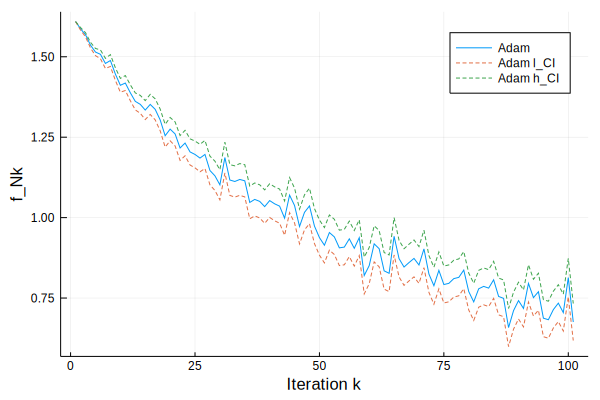

In [48]:
p, _ = plotting_with_CI(fAdam, mo, paramAdam, ones(Int, length(fAdam))*sizeBatch, "Adam")

p

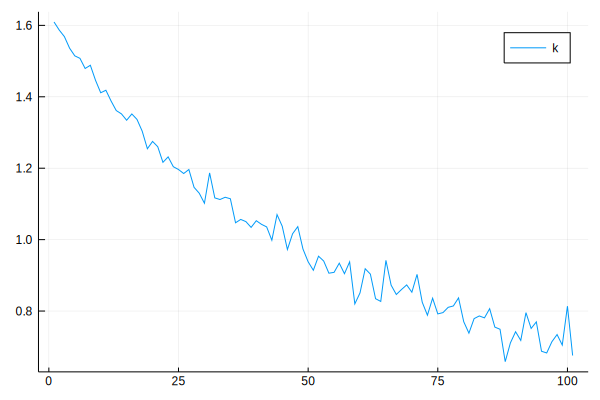

In [42]:
plot(fAdam, label = "k")

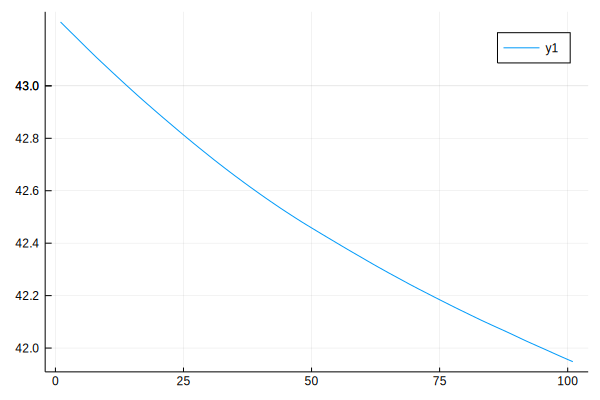

In [43]:
plot(resultAdam[:DistTo])

In [7]:
##############################################################################
TYPE = Float64

#####################################################################################
# Optimisation
verbose = true

IterMax = 20 # Nombre iterations maximales
TMax = 1800.0 # Temps max en secondes
epsilonOptimisation = 10^(-4) # Precision norme gradient

# Sampling init
N0 = 100
NMin = 50
increment = 1;

# subSampling
coeff_bhhh = 0.25
maxBhhh = 10000
subSampling = ConstantCoeffSubSampling(maxBhhh, coeff_bhhh)

#btrCoeffs = Geraldine.BTRDefaults() # avec 4*‖s‖
btrCoeffs = Geraldine.BTRCoeffs() # avec expension de γ_3 pour iteration tres reussie


Geraldine.BasicTrustRegionWithCoeff{Float64}(0.01, 0.8, 0.5, 0.9, 1.5)

In [8]:
Accum_2nd_full(xstar::Vector = [0.0, 1, 1, 2, 3, 5, 8, 13, 21, 34]) = Accumulator(Value(), Iter(),
                FieldAccumulator{Float64}(:fcand), Delta(), Times(), SamplingSizeAccumulator(), DistTo(xstar),
                FieldAccumulator{Float64}(:mu), 
                FieldAccumulator{Float64}(:ρ), NStep(), FieldAccumulator{Float64}(:iterCG), IsAcceptedAccumulator(), Param())

Accum_2nd_tv(xstar::Vector = [0.0, 1, 1, 2, 3, 5, 8, 13, 21, 34]) = Accumulator(Value(), Iter(),
                FieldAccumulator{Float64}(:fcand), Delta(), Times(), SamplingSizeAccumulator(), DistTo(xstar),
                FieldAccumulator{Float64}(:mu), FieldAccumulator{Float64}(:sHs) ,
                FieldAccumulator{Float64}(:ρ),  FieldAccumulator{Float64}(:iterCG), IsAcceptedAccumulator(), Param())

Accum_2nd_sHs(xstar::Vector = [0.0, 1, 1, 2, 3, 5, 8, 13, 21, 34]) = Accumulator(Value(), Iter(),
                FieldAccumulator{Float64}(:fcand), Delta(), Times(), SamplingSizeAccumulator(), DistTo(xstar),
                FieldAccumulator{Float64}(:mu),  FieldAccumulator{Float64}(:sHs) ,
                FieldAccumulator{Float64}(:ρ),  FieldAccumulator{Float64}(:iterCG), IsAcceptedAccumulator(), Param())

Accum_2nd_sHs (generic function with 2 methods)

In [16]:


##############################################################################
                                # Test Full function / gradient / Hessian

# Hessian
Hessian = Geraldine.UncomputedHessian{TYPE}

smoothing = Geraldine.NoSmoothing()

varStrategy = Geraldine.GradientVar{Float64}(smoothing)

# --- Sampling
samplingStrategy = samplingStrategy = Geraldine.NormTestSampling{Geraldine.IndComRN}(Sofia.Nobs(mo), 0.3, varStrategy, 
                                                                    NMin = NMin, N0=N0, 
                                                                    increment=increment, 
                                                                    subSampling=subSampling)


# BTR
accBtr =  Accum_2nd_full(xstar)

sp = Geraldine.StopParam(;NMax = IterMax, TMax = TMax, eps_g = epsOptimisation);

btr =  Geraldine.BTRStruct(sp; Hessian = Hessian,  sam=typeof(samplingStrategy))

state, accumulatorHESfull = btr(mo, copy(x0) , samplingStrategy, accumulator = accBtr, verbose = verbose)

# Collecting results
 resultHESfull = Geraldine.structToDict(accumulatorHESfull)

--- Iteration 0 (selected SAM) : 
------ Classic btr ---------- : 
 --- sampling : Geraldine.NormTestSampling{Geraldine.IndComRN,Int64}
-------------------------
initializeState! AbstractStochasticModel -- Classic
initializeSampling Geraldine.NormTestSampling{Geraldine.IndComRN,Int64}! Ind / Com RN
Compute gradient for Gradient Var !!!
var = 6.558213896903102
------- Classic updatePreviousValues --------
Do nothing
-------------------------
Tests arret !!!!
 Test is Grad Optimal ? ‖g‖ = 1.200849827111758 and ϵ = 1.0000000000000004e-6
Nmax reached ? 
k = 0  and  max = 20

Iteration 0 -> 1
computecand! AbstractStochasticModel -- Classic
--- TCG classic 
κ = 1.4428481838777785
TCG on border
TCG stoped on iteration 1
-------------------------
--------- Classic iter to Do ----------
Nothing done 
-------------------------
updateState! AbstractStochasticModel  -- Classic
 --- updateSampleSize! --- Ind / Common Variables : Geraldine.NormTestSampling{Geraldine.IndComRN,Int64}
Current sample si

- Increase !! with 316
New sample size = 513
Compute gradient for Gradient Var !!!
var = 1.1082660203164643
------- Classic updatePreviousValues --------
Do nothing
-------------------------
step accepted, region expanded (VERY good accuracy)

--------------------------------------------------------------------------------
Iteration 8
0.25632080440124433
--------------------------------------------------------------------------------
Tests arret !!!!
 Test is Grad Optimal ? ‖g‖ = 0.10161255078563913 and ϵ = 1.0000000000000004e-6
Nmax reached ? 
k = 8  and  max = 20

Iteration 8 -> 9
computecand! AbstractStochasticModel -- Classic
--- TCG classic 
κ = 0.0018278200272450007
κ = 0.0003946711747639134
κ = 0.0007200146113042091
κ = 0.0006136286674097441
TCG stoped on iteration 4
-------------------------
--------- Classic iter to Do ----------
Nothing done 
-------------------------
updateState! AbstractStochasticModel  -- Classic
 --- updateSampleSize! --- Ind / Common Variables : Geraldin

New sample size = 799744
Compute gradient for Gradient Var !!!
var = 0.24215009294933504
------- Classic updatePreviousValues --------
Do nothing
-------------------------
step accepted, region expanded (VERY good accuracy)

--------------------------------------------------------------------------------
Iteration 15
0.04471667965894383
--------------------------------------------------------------------------------
Tests arret !!!!
 Test is Grad Optimal ? ‖g‖ = 0.0005998734232161014 and ϵ = 1.0000000000000004e-6
Nmax reached ? 
k = 15  and  max = 20

Iteration 15 -> 16
computecand! AbstractStochasticModel -- Classic
--- TCG classic 
κ = 9.460519520074272e-9
κ = 4.825840938359995e-11
κ = 2.5824492326139367e-12
κ = 5.745048052621151e-10
κ = 1.5932260787757617e-9
κ = 1.5503686659325038e-11
TCG stoped on iteration 6
-------------------------
--------- Classic iter to Do ----------
Nothing done 
-------------------------
updateState! AbstractStochasticModel  -- Classic
 --- updateSampleSiz

Dict{Symbol,Any} with 9 entries:
  :IsAcceptedAccumulator              => Bool[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
  :DeltaAccumulator                   => [0.120085, 0.180127, 0.270191, 0.40528…
  Symbol("FieldAccumulator{Float64}") => [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 4.…
  :DistTo                             => [43.2435, 43.1859, 43.1027, 42.978, 42…
  :ParamAccumulator                   => Array{T,1} where T[[0.0, 0.0, 0.0, 0.0…
  :ValueAccumulator                   => [1.60944, 1.5411, 1.43773, 1.30361, 1.…
  :SamplingSizeAccumulator            => ([100, 51, 54, 57, 67, 95, 130, 197, 5…
  :Times                              => [0.0, 0.438876, 0.694368, 0.947701, 1.…
  :IterAccumulator                    => [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,…

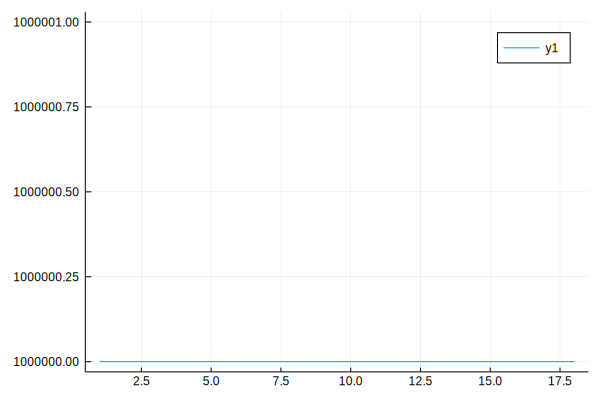

In [44]:
plot(resultHESfull[:SamplingSizeAccumulator][1])

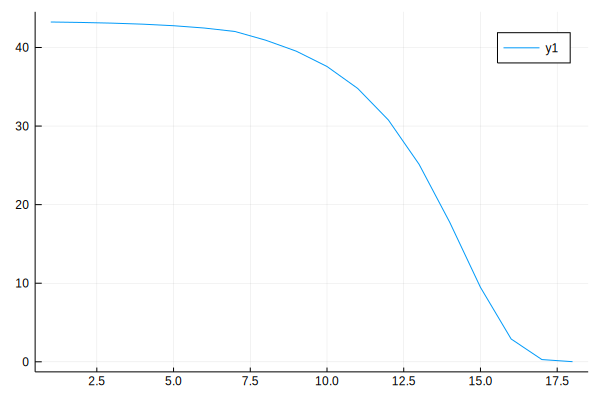

In [45]:
plot(resultHESfull[:DistTo])

In [19]:


##############################################################################
                                # Test Full function / gradient / Hessian

# Hessian
Hessian = Geraldine.UncomputedHessian{TYPE}

smoothing = Geraldine.NoSmoothing()

varStrategy = Geraldine.GradientDotProductVar{Float64}(smoothing)


# --- Sampling
samplingStrategy = samplingStrategy = Geraldine.InnerProductTestSampling{Geraldine.IndComRN}(Sofia.Nobs(mo), varStrategy, 
                                                                    NMin = NMin, N0=N0, 
                                                                    increment=increment, 
                                                                    subSampling=subSampling)
# BTR
accBtr =  Accum_2nd_full(xstar)

sp = Geraldine.StopParam(;NMax = IterMax, TMax = TMax, eps_g = epsOptimisation);

btr =  Geraldine.BTRStruct(sp; Hessian = Hessian,  sam=typeof(samplingStrategy))

state, accumulatorHESfull = btr(mo, copy(x0) , samplingStrategy, accumulator = accBtr, verbose = verbose)

# Collecting results
 resultHESfull = Geraldine.structToDict(accumulatorHESfull)

--- Iteration 0 (selected SAM) : 
------ Classic btr ---------- : 
 --- sampling : Geraldine.InnerProductTestSampling{Geraldine.IndComRN,Int64}
-------------------------
initializeState! AbstractStochasticModel -- Classic
initializeSampling Geraldine.InnerProductTestSampling{Geraldine.IndComRN,Int64}! Ind / Com RN
Compute gradient for Gradient Dot Product Var !!!
var = 0.41124439743883057
------- Classic updatePreviousValues --------
Do nothing
-------------------------
Tests arret !!!!
 Test is Grad Optimal ? ‖g‖ = 1.200849827111758 and ϵ = 1.0000000000000004e-6
Nmax reached ? 
k = 0  and  max = 20

Iteration 0 -> 1
computecand! AbstractStochasticModel -- Classic
--- TCG classic 
κ = 1.100129752668133
TCG on border
TCG stoped on iteration 1
-------------------------
--------- Classic iter to Do ----------
Nothing done 
-------------------------
updateState! AbstractStochasticModel  -- Classic
 --- updateSampleSize! --- Ind / Common Variables : Geraldine.InnerProductTestSampling{Gerald

New sample size = 57
Compute gradient for Gradient Dot Product Var !!!
var = 0.000306055390506107
------- Classic updatePreviousValues --------
Do nothing
-------------------------
step accepted, region expanded (VERY good accuracy)

--------------------------------------------------------------------------------
Iteration 8
0.28723718922871105
--------------------------------------------------------------------------------
Tests arret !!!!
 Test is Grad Optimal ? ‖g‖ = 0.0849777156659413 and ϵ = 1.0000000000000004e-6
Nmax reached ? 
k = 8  and  max = 20

Iteration 8 -> 9
computecand! AbstractStochasticModel -- Classic
--- TCG classic 
κ = 0.0009161096725345475
κ = 0.0007956033831281524
κ = 0.002160312375175607
κ = 0.0012804209912693973
TCG on border
TCG stoped on iteration 4
-------------------------
--------- Classic iter to Do ----------
Nothing done 
-------------------------
updateState! AbstractStochasticModel  -- Classic
 --- updateSampleSize! --- Ind / Common Variables : Gerald

New sample size = 76
Compute gradient for Gradient Dot Product Var !!!
var = 7.761650812330805e-5
------- Classic updatePreviousValues --------
Do nothing
-------------------------
step accepted, region expanded (VERY good accuracy)

--------------------------------------------------------------------------------
Iteration 18
0.12475484120963123
--------------------------------------------------------------------------------
Tests arret !!!!
 Test is Grad Optimal ? ‖g‖ = 0.028039022027333806 and ϵ = 1.0000000000000004e-6
Nmax reached ? 
k = 18  and  max = 20

Iteration 18 -> 19
computecand! AbstractStochasticModel -- Classic
--- TCG classic 
κ = 6.045492367462885e-5
κ = 9.15091451131871e-5
TCG on border
TCG stoped on iteration 2
-------------------------
step refused region reduced (BAD accuracy)

--------------------------------------------------------------------------------
Iteration 19
0.12475484120963123
-----------------------------------------------------------------------------

Dict{Symbol,Any} with 9 entries:
  :IsAcceptedAccumulator              => Bool[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, …
  :DeltaAccumulator                   => [0.120085, 0.180127, 0.270191, 0.40528…
  Symbol("FieldAccumulator{Float64}") => [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 4.…
  :DistTo                             => [43.2435, 43.1859, 43.1024, 42.9764, 4…
  :ParamAccumulator                   => Array{T,1} where T[[0.0, 0.0, 0.0, 0.0…
  :ValueAccumulator                   => [1.60944, 1.54242, 1.44767, 1.3195, 1.…
  :SamplingSizeAccumulator            => ([100, 50, 51, 52, 53, 54, 55, 56, 57,…
  :Times                              => [0.0, 0.181773, 0.384779, 0.735773, 0.…
  :IterAccumulator                    => [0, 1, 2, 3, 4, 5, 6, 7, 8, 9  …  11, …

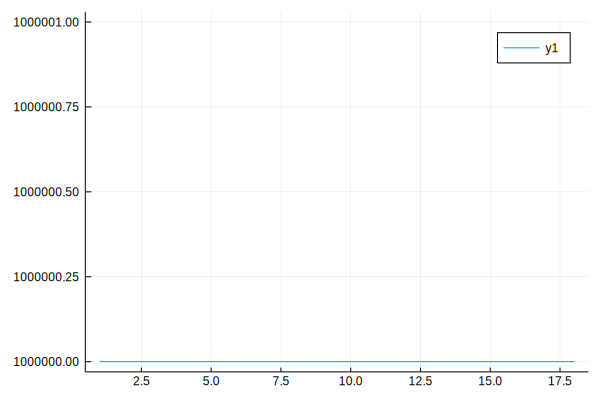

In [46]:
plot(resultHESfull[:SamplingSizeAccumulator][1])

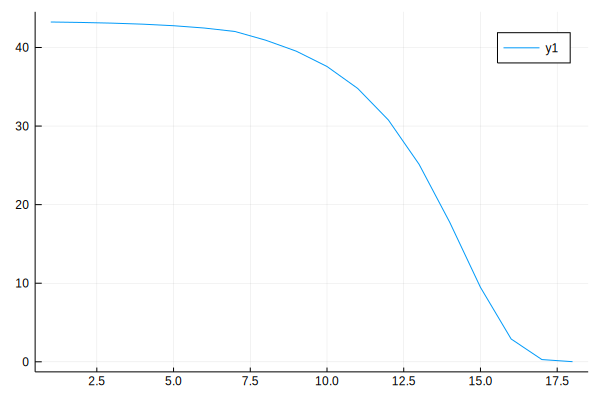

In [47]:
plot(resultHESfull[:DistTo])

In [22]:
##############################################################################
                                # Test Full function / gradient / Hessian

accumulator = Accum_2nd_tv(xstar)
# Hessian
Hessian = Geraldine.UncomputedHessian{TYPE}

# --- Sampling
subSampling = Geraldine.FullHessian()
samplingStrategy = Geraldine.NoSampling(Nobs(mo), subSampling=subSampling)

# BTR
accBtr =  Accum_2nd_full(xstar)

sp = Geraldine.StopParam(;NMax = IterMax, TMax = TMax, eps_g = epsOptimisation);

btr =  Geraldine.BTRStruct(sp; Hessian = Hessian,  sam=typeof(samplingStrategy))

state, accumulatorHESfull = btr(mo, copy(x0) , samplingStrategy, accumulator = accBtr, verbose = verbose)

# Collecting results
 resultHESfull = Geraldine.structToDict(accumulatorHESfull)

--- Iteration 0 (selected SAM) : 
------ Classic btr ---------- : 
 --- sampling : Geraldine.NoSampling
-------------------------
initializeState! AbstractStochasticModel -- Classic
compute gradient for Classic
------- Classic updatePreviousValues --------
Do nothing
-------------------------
Tests arret !!!!
 Test is Grad Optimal ? ‖g‖ = 1.1627290165465178 and ϵ = 1.0000000000000004e-6
Nmax reached ? 
k = 0  and  max = 20

Iteration 0 -> 1
computecand! AbstractStochasticModel -- Classic
--- TCG classic 
κ = 1.081137872430489
TCG on border
TCG stoped on iteration 1
-------------------------
--------- Classic iter to Do ----------
Nothing done 
-------------------------
updateState! AbstractStochasticModel  -- Classic
compute gradient for Classic
------- Classic updatePreviousValues --------
Do nothing
-------------------------
step accepted, region expanded (VERY good accuracy)

--------------------------------------------------------------------------------
Iteration 1
1.5431919670794

κ = 6.455864689880502e-7
κ = 3.490124157271726e-5
TCG stoped on iteration 2
-------------------------
--------- Classic iter to Do ----------
Nothing done 
-------------------------
updateState! AbstractStochasticModel  -- Classic
compute gradient for Classic
------- Classic updatePreviousValues --------
Do nothing
-------------------------
step accepted, region expanded (VERY good accuracy)

--------------------------------------------------------------------------------
Iteration 11
0.08461798341733323
--------------------------------------------------------------------------------
Tests arret !!!!
 Test is Grad Optimal ? ‖g‖ = 0.0058718591355537905 and ϵ = 1.0000000000000004e-6
Nmax reached ? 
k = 11  and  max = 20

Iteration 11 -> 12
computecand! AbstractStochasticModel -- Classic
--- TCG classic 
κ = 3.779833257307775e-8
κ = 1.2652539252438884e-5
TCG stoped on iteration 2
-------------------------
--------- Classic iter to Do ----------
Nothing done 
-------------------------
upda

Dict{Symbol,Any} with 9 entries:
  :IsAcceptedAccumulator              => Bool[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
  :DeltaAccumulator                   => [0.116273, 0.174409, 0.261614, 0.39242…
  Symbol("FieldAccumulator{Float64}") => [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.…
  :DistTo                             => [43.2435, 43.1854, 43.0982, 42.9673, 4…
  :ParamAccumulator                   => Array{T,1} where T[[0.0, 0.0, 0.0, 0.0…
  :ValueAccumulator                   => [1.60944, 1.54319, 1.44887, 1.31862, 1…
  :SamplingSizeAccumulator            => ([1000000, 1000000, 1000000, 1000000, …
  :Times                              => [0.0, 31.2768, 62.0005, 119.084, 151.4…
  :IterAccumulator                    => [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,…

In [23]:
##############################################################################
                                # Test Full function / gradient 
                                #   Sub-sampled Hessian

accumulator = Accum_2nd_tv(xstar)
# Hessian
Hessian = Geraldine.UncomputedHessian{TYPE}

# --- Sampling
subSampling = ConstantCoeffSubSampling(maxBhhh, coeff_bhhh)

samplingStrategy = Geraldine.NoSampling(Nobs(mo), subSampling=subSampling)

# BTR
accBtr =  Accum_2nd_full(xstar)

sp = Geraldine.StopParam(;NMax = IterMax, TMax = TMax, eps_g = epsOptimisation);

btr =  Geraldine.BTRStruct(sp; Hessian = Hessian,  sam=typeof(samplingStrategy))

state, accumulatorHES_sub = btr(mo, copy(x0) , samplingStrategy, accumulator = accBtr, verbose = verbose)

 # Collecting results
 resultHES_sub = Geraldine.structToDict(accumulatorHES_sub)

--- Iteration 0 (selected SAM) : 
------ Classic btr ---------- : 
 --- sampling : Geraldine.NoSampling
-------------------------
initializeState! AbstractStochasticModel -- Classic
compute gradient for Classic
------- Classic updatePreviousValues --------
Do nothing
-------------------------
Tests arret !!!!
 Test is Grad Optimal ? ‖g‖ = 1.1627290165465178 and ϵ = 1.0000000000000004e-6
Nmax reached ? 
k = 0  and  max = 20

Iteration 0 -> 1
computecand! AbstractStochasticModel -- Classic
--- TCG classic 
κ = 1.069134605507795
TCG on border
TCG stoped on iteration 1
-------------------------
--------- Classic iter to Do ----------
Nothing done 
-------------------------
updateState! AbstractStochasticModel  -- Classic
compute gradient for Classic
------- Classic updatePreviousValues --------
Do nothing
-------------------------
step accepted, region expanded (VERY good accuracy)

--------------------------------------------------------------------------------
Iteration 1
1.5431919670794

--- TCG classic 
κ = 8.733876096272802e-7
κ = 0.00014001473447828247
κ = 9.404005640888534e-7
TCG stoped on iteration 3
-------------------------
--------- Classic iter to Do ----------
Nothing done 
-------------------------
updateState! AbstractStochasticModel  -- Classic
compute gradient for Classic
------- Classic updatePreviousValues --------
Do nothing
-------------------------
step accepted, region expanded (VERY good accuracy)

--------------------------------------------------------------------------------
Iteration 11
0.08521869556862192
--------------------------------------------------------------------------------
Tests arret !!!!
 Test is Grad Optimal ? ‖g‖ = 0.006204707911189832 and ϵ = 1.0000000000000004e-6
Nmax reached ? 
k = 11  and  max = 20

Iteration 11 -> 12
computecand! AbstractStochasticModel -- Classic
--- TCG classic 
κ = 2.796562392927814e-7
κ = 4.654745524037572e-6
κ = 5.100044983224024e-6
TCG stoped on iteration 3
-------------------------
--------- Classic

Dict{Symbol,Any} with 9 entries:
  :IsAcceptedAccumulator              => Bool[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
  :DeltaAccumulator                   => [0.116273, 0.174409, 0.261614, 0.39242…
  Symbol("FieldAccumulator{Float64}") => [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.…
  :DistTo                             => [43.2435, 43.1854, 43.0982, 42.9673, 4…
  :ParamAccumulator                   => Array{T,1} where T[[0.0, 0.0, 0.0, 0.0…
  :ValueAccumulator                   => [1.60944, 1.54319, 1.44887, 1.31862, 1…
  :SamplingSizeAccumulator            => ([1000000, 1000000, 1000000, 1000000, …
  :Times                              => [0.0, 9.54347, 16.7506, 23.8713, 31.03…
  :IterAccumulator                    => [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,…

In [24]:
##############################################################################
                                # Test Hessian / True Var 

accumulator = Accum_2nd_tv(xstar)
# Hessian
Hessian = Geraldine.UncomputedHessian{TYPE}

# Smoothing
smoothing = Geraldine.NaiveSmoothing()
# --- Sampling
varStrategy = Geraldine.TrueVar{Float64}(smoothing)

# --- Sampling
subSampling = ConstantCoeffSubSampling(maxBhhh, coeff_bhhh)
samplingStrategy = Geraldine.DynamicSampling{Geraldine.IndComRN}(Sofia.Nobs(mo), varStrategy, 
                                                                    NMin = NMin, N0=N0, 
                                                                    increment=increment, 
                                                                    subSampling=subSampling)

# BTR
accBtr =  Accum_2nd_tv(xstar)

sp = Geraldine.StopParam(;NMax = IterMax, TMax = TMax, eps_g = epsOptimisation);

btr =  Geraldine.BTRStruct(sp; Hessian = Hessian,  sam=typeof(samplingStrategy))

state, accumulatorHEStv = btr(mo, copy(x0) , samplingStrategy, accumulator = accBtr, verbose = verbose)

 # Collecting results
 resultHEStv = Geraldine.structToDict(accumulatorHEStv)

--- Iteration 0 (selected SAM) : 
------ Classic btr ---------- : 
 --- sampling : Geraldine.DynamicSampling{Geraldine.IndComRN,Int64}
-------------------------
initializeState! AbstractStochasticModel -- Classic
initializeSampling Geraldine.DynamicSampling{Geraldine.IndComRN,Int64}! Ind / Com RN
compute gradient for Classic
-------  updatePreviousValues  True Var --------
-------------------------
Tests arret !!!!
 Test is Grad Optimal ? ‖g‖ = 1.200849827111758 and ϵ = 1.0000000000000004e-6
Nmax reached ? 
k = 0  and  max = 20

Iteration 0 -> 1
computecand! AbstractStochasticModel -- Classic
--- TCG classic 
κ = 1.6000449377730672
TCG on border
TCG stoped on iteration 1
-------------------------
--------- Classic iter to Do ----------
Nothing done 
-------------------------
updateState! AbstractStochasticModel  -- Classic
 --- updateSampleSize! --- Ind / Common Variables : Geraldine.DynamicSampling{Geraldine.IndComRN,Int64}
Current sample size = 100
potentialSampleSize for Dynamic sam

New sample size = 57
compute gradient for Classic
-------  updatePreviousValues  True Var --------
-------------------------
step accepted, region expanded (VERY good accuracy)

--------------------------------------------------------------------------------
Iteration 8
0.2154766014550316
--------------------------------------------------------------------------------
Tests arret !!!!
 Test is Grad Optimal ? ‖g‖ = 0.14517988151605463 and ϵ = 1.0000000000000004e-6
Nmax reached ? 
k = 8  and  max = 20

Iteration 8 -> 9
computecand! AbstractStochasticModel -- Classic
--- TCG classic 
κ = 0.008673577099382008
κ = 0.002255578999246556
κ = 0.0005930107471568075
κ = 0.0003477083328884318
κ = 0.0006716716230501233
κ = 0.00041316927451714595
κ = 8.028030960602116e-5
TCG stoped on iteration 7
-------------------------
--------- Classic iter to Do ----------
Nothing done 
-------------------------
updateState! AbstractStochasticModel  -- Classic
 --- updateSampleSize! --- Ind / Common Variables :

k = 16  and  max = 20

Iteration 16 -> 17
computecand! AbstractStochasticModel -- Classic
--- TCG classic 
κ = 3.463185689202954e-5
κ = 8.141564677747546e-6
TCG on border
TCG stoped on iteration 2
-------------------------
--------- Classic iter to Do ----------
Nothing done 
-------------------------
updateState! AbstractStochasticModel  -- Classic
 --- updateSampleSize! --- Ind / Common Variables : Geraldine.DynamicSampling{Geraldine.IndComRN,Int64}
Current sample size = 1010
potentialSampleSize for Dynamic sampling
 --- True Var sHs !!!
Naive smoothing -- int = 0.75 / sup = 2.0
New size = 2020
- Increase !! with 1010
New sample size = 2020
compute gradient for Classic
-------  updatePreviousValues  True Var --------
-------------------------
step accepted, region expanded (VERY good accuracy)

--------------------------------------------------------------------------------
Iteration 17
0.11592166352163476
------------------------------------------------------------------------------

Dict{Symbol,Any} with 9 entries:
  :IsAcceptedAccumulator              => Bool[1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, …
  :DeltaAccumulator                   => [0.120085, 0.180127, 0.270191, 0.40528…
  Symbol("FieldAccumulator{Float64}") => [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 3.…
  :DistTo                             => [43.2435, 43.1859, 43.0997, 42.9695, 4…
  :ParamAccumulator                   => Array{T,1} where T[[0.0, 0.0, 0.0, 0.0…
  :ValueAccumulator                   => [1.60944, 1.5403, 1.44549, 1.30653, 1.…
  :SamplingSizeAccumulator            => ([100, 75, 56, 52, 53, 54, 55, 56, 57,…
  :Times                              => [0.0, 0.209733, 0.249059, 0.295502, 0.…
  :IterAccumulator                    => [0, 1, 2, 3, 4, 5, 6, 7, 8, 9  …  11, …

In [25]:
 # Collecting results
 resultHEStv = Geraldine.structToDict(accumulatorHEStv)

samplingHEStv = resultHEStv[:SamplingSizeAccumulator]
fHEStv = resultHEStv[:ValueAccumulator]
paramHEStv = resultHEStv[:ParamAccumulator];

In [26]:
plot(samplingHEStv[1])

<!DOCTYPE html>
 
 
 Plots.jl

In [27]:
##############################################################################
                                # Test Hessian / Ture Var 

accumulator = Accum_2nd_tv(xstar)
# Hessian
Hessian = Geraldine.UncomputedHessian{TYPE}

# Smoothing
smoothing = Geraldine.CumulativeDecreaseSmoothing{Float64}(maxIter=5)

# --- Sampling
varStrategy = Geraldine.TrueVar{Float64}(smoothing)

# --- Sampling
Geraldine.DynamicSampling{Geraldine.IndComRN}(Sofia.Nobs(mo), varStrategy, 
                                                                    NMin = NMin, N0=N0, 
                                                                    increment=increment, 
                                                                    subSampling=subSampling)


# BTR
accBtr =  Accum_2nd_tv(xstar)

sp = Geraldine.StopParam(;NMax = IterMax, TMax = TMax, eps_g = epsOptimisation);

btr =  Geraldine.BTRStruct(sp; Hessian = Hessian,  sam=typeof(samplingStrategy))

state, accumulatorHEStv2 = btr(mo, copy(x0) , samplingStrategy, accumulator = accBtr, verbose = verbose)


--- Iteration 0 (selected SAM) : 
------ Classic btr ---------- : 
 --- sampling : Geraldine.DynamicSampling{Geraldine.IndComRN,Int64}
-------------------------
initializeState! AbstractStochasticModel -- Classic
initializeSampling Geraldine.DynamicSampling{Geraldine.IndComRN,Int64}! Ind / Com RN
compute gradient for Classic
-------  updatePreviousValues  True Var --------
-------------------------
Tests arret !!!!
 Test is Grad Optimal ? ‖g‖ = 1.1367614531508978 and ϵ = 1.0000000000000004e-6
Nmax reached ? 
k = 0  and  max = 20

Iteration 0 -> 1
computecand! AbstractStochasticModel -- Classic
--- TCG classic 
κ = 0.9749993779603691
TCG on border
TCG stoped on iteration 1
-------------------------
--------- Classic iter to Do ----------
Nothing done 
-------------------------
updateState! AbstractStochasticModel  -- Classic
 --- updateSampleSize! --- Ind / Common Variables : Geraldine.DynamicSampling{Geraldine.IndComRN,Int64}
Current sample size = 876
potentialSampleSize for Dynamic sa

-------------------------
step accepted, region expanded (VERY good accuracy)

--------------------------------------------------------------------------------
Iteration 8
0.24753157598609313
--------------------------------------------------------------------------------
Tests arret !!!!
 Test is Grad Optimal ? ‖g‖ = 0.12673208070595138 and ϵ = 1.0000000000000004e-6
Nmax reached ? 
k = 8  and  max = 20

Iteration 8 -> 9
computecand! AbstractStochasticModel -- Classic
--- TCG classic 
κ = 0.0025854628442487327
κ = 0.002947118226117535
κ = 0.0007753172406671032
κ = 0.0005525971617603574
κ = 0.0012805819803995391
κ = 0.00029927023259756293
TCG stoped on iteration 6
-------------------------
--------- Classic iter to Do ----------
Nothing done 
-------------------------
updateState! AbstractStochasticModel  -- Classic
 --- updateSampleSize! --- Ind / Common Variables : Geraldine.DynamicSampling{Geraldine.IndComRN,Int64}
Current sample size = 87
potentialSampleSize for Dynamic sampling
 --

New sample size = 2067
compute gradient for Classic
-------  updatePreviousValues  True Var --------
-------------------------
step accepted, region expanded (VERY good accuracy)

--------------------------------------------------------------------------------
Iteration 17
0.12114867408901146
--------------------------------------------------------------------------------
Tests arret !!!!
 Test is Grad Optimal ? ‖g‖ = 0.03215884571727157 and ϵ = 1.0000000000000004e-6
Nmax reached ? 
k = 17  and  max = 20

Iteration 17 -> 18
computecand! AbstractStochasticModel -- Classic
--- TCG classic 
κ = 0.0001264129089626568
κ = 9.096349653820402e-6
κ = 7.074282900967943e-6
TCG on border
TCG stoped on iteration 3
-------------------------
--------- Classic iter to Do ----------
Nothing done 
-------------------------
updateState! AbstractStochasticModel  -- Classic
 --- updateSampleSize! --- Ind / Common Variables : Geraldine.DynamicSampling{Geraldine.IndComRN,Int64}
Current sample size = 2067
pot

"here's a state""here's an Accumulator"

In [28]:
##############################################################################

                        # Test 1 : BHHH / True Var

# --- Hessian Approx
Hessian = Geraldine.BHHHScores{TYPE}
# Smoothing
smoothing = Geraldine.NaiveSmoothing()
# --- Sampling
varStrategy = Geraldine.TrueVar{Float64}(smoothing)

samplingStrategy = Geraldine.DynamicSampling{Geraldine.IndComRN}(Sofia.Nobs(mo), varStrategy, 
                                                                    NMin = NMin, N0=N0, 
                                                                    increment=increment, 
                                                                    subSampling=subSampling)

# BTR
accBHHH =  Accum_2nd_sHs(xstar)

sp = Geraldine.StopParam(;NMax = IterMax, TMax = 120.0, eps_g = epsOptimisation);

btr =  Geraldine.BTRStruct(sp; Hessian = Hessian, sam=typeof(samplingStrategy))

state, accumulatorBHHHtv = btr(mo, copy(x0) , samplingStrategy, accumulator = accBHHH, verbose = verbose)

--- Iteration 0 (selected SAM) : 
------ Classic btr ---------- : 
 --- sampling : Geraldine.DynamicSampling{Geraldine.IndComRN,Int64}
-------------------------
initializeState! AbstractStochasticModel -- Classic
initializeSampling Geraldine.DynamicSampling{Geraldine.IndComRN,Int64}! Ind / Com RN
compute gradient for Classic
-------  updatePreviousValues  True Var --------
-------------------------
Tests arret !!!!
 Test is Grad Optimal ? ‖g‖ = 1.200849827111758 and ϵ = 1.0000000000000004e-6
Nmax reached ? 
k = 0  and  max = 20

Iteration 0 -> 1
computecand! AbstractStochasticModel -- Classic
--- TCG classic 
κ = 1.8313236300509061
TCG on border
TCG stoped on iteration 1
-------------------------
--------- Classic iter to Do ----------
Nothing done 
-------------------------
updateState! AbstractStochasticModel  -- Classic
 --- updateSampleSize! --- Ind / Common Variables : Geraldine.DynamicSampling{Geraldine.IndComRN,Int64}
Current sample size = 100
potentialSampleSize for Dynamic sam

New sample size = 57
compute gradient for Classic
-------  updatePreviousValues  True Var --------
-------------------------
step accepted, region expanded (VERY good accuracy)

--------------------------------------------------------------------------------
Iteration 8
0.26557734187206383
--------------------------------------------------------------------------------
Tests arret !!!!
 Test is Grad Optimal ? ‖g‖ = 0.11464067141584772 and ϵ = 1.0000000000000004e-6
Nmax reached ? 
k = 8  and  max = 20

Iteration 8 -> 9
computecand! AbstractStochasticModel -- Classic
--- TCG classic 
κ = 0.00019308527078932056
TCG on border
TCG stoped on iteration 1
-------------------------
--------- Classic iter to Do ----------
Nothing done 
-------------------------
updateState! AbstractStochasticModel  -- Classic
 --- updateSampleSize! --- Ind / Common Variables : Geraldine.DynamicSampling{Geraldine.IndComRN,Int64}
Current sample size = 57
potentialSampleSize for Dynamic sampling
 --- True Var sHs !

New sample size = 530
compute gradient for Classic
-------  updatePreviousValues  True Var --------
-------------------------
step accepted, region reduced (good accuracy)

--------------------------------------------------------------------------------
Iteration 17
0.16144483266504756
--------------------------------------------------------------------------------
Tests arret !!!!
 Test is Grad Optimal ? ‖g‖ = 0.05313716507675869 and ϵ = 1.0000000000000004e-6
Nmax reached ? 
k = 17  and  max = 20

Iteration 17 -> 18
computecand! AbstractStochasticModel -- Classic
--- TCG classic 
κ = 0.0002047412203730502
TCG on border
TCG stoped on iteration 1
-------------------------
--------- Classic iter to Do ----------
Nothing done 
-------------------------
updateState! AbstractStochasticModel  -- Classic
 --- updateSampleSize! --- Ind / Common Variables : Geraldine.DynamicSampling{Geraldine.IndComRN,Int64}
Current sample size = 530
potentialSampleSize for Dynamic sampling
 --- True Var sHs !!

"here's a state""here's an Accumulator"

In [29]:
 # Collecting results
 resultBHHHtv = Geraldine.structToDict(accumulatorBHHHtv)

samplingBHHHtv = resultBHHHtv[:SamplingSizeAccumulator]
fBHHHtv = resultBHHHtv[:ValueAccumulator]
paramBHHHtv = resultBHHHtv[:ParamAccumulator];

In [30]:
plot(samplingBHHHtv[1])

<!DOCTYPE html>
 
 
 Plots.jl

In [31]:
##############################################################################

                        # Test 1 : BHHH / True Var -> Cumulative Decrease

# --- Hessian Approx
Hessian = Geraldine.BHHHScores{TYPE}
# Smoothing
smoothing = Geraldine.NaiveSmoothing()
# --- Sampling
varStrategy = Geraldine.TrueVar{Float64}(smoothing)

samplingStrategy = Geraldine.DynamicSampling{Geraldine.IndComRN}(Sofia.Nobs(mo), varStrategy, 
                                                                    NMin = NMin, N0=N0, 
                                                                    increment=increment, 
                                                                    subSampling=subSampling)

# BTR
accBHHH =  Accum_2nd_sHs(xstar)

sp = Geraldine.StopParam(;NMax = 1000, TMax = 120.0, eps_g = epsOptimisation);

btr =  Geraldine.BTRStruct(sp; Hessian = Hessian, sam=typeof(samplingStrategy))

state, accumulatorBHHHtv = btr(mo, copy(x0) , samplingStrategy, accumulator = accBHHH, verbose = verbose)

--- Iteration 0 (selected SAM) : 
------ Classic btr ---------- : 
 --- sampling : Geraldine.DynamicSampling{Geraldine.IndComRN,Int64}
-------------------------
initializeState! AbstractStochasticModel -- Classic
initializeSampling Geraldine.DynamicSampling{Geraldine.IndComRN,Int64}! Ind / Com RN
compute gradient for Classic
-------  updatePreviousValues  True Var --------
-------------------------
Tests arret !!!!
 Test is Grad Optimal ? ‖g‖ = 1.200849827111758 and ϵ = 1.0000000000000004e-6
Nmax reached ? 
k = 0  and  max = 1000

Iteration 0 -> 1
computecand! AbstractStochasticModel -- Classic
--- TCG classic 
κ = 2.780352817704662
TCG on border
TCG stoped on iteration 1
-------------------------
--------- Classic iter to Do ----------
Nothing done 
-------------------------
updateState! AbstractStochasticModel  -- Classic
 --- updateSampleSize! --- Ind / Common Variables : Geraldine.DynamicSampling{Geraldine.IndComRN,Int64}
Current sample size = 100
potentialSampleSize for Dynamic sa

New sample size = 57
compute gradient for Classic
-------  updatePreviousValues  True Var --------
-------------------------
step accepted, region expanded (VERY good accuracy)

--------------------------------------------------------------------------------
Iteration 8
0.31569958449489954
--------------------------------------------------------------------------------
Tests arret !!!!
 Test is Grad Optimal ? ‖g‖ = 0.11980751673995725 and ϵ = 1.0000000000000004e-6
Nmax reached ? 
k = 8  and  max = 1000

Iteration 8 -> 9
computecand! AbstractStochasticModel -- Classic
--- TCG classic 
κ = 0.0006781207693845519
κ = 0.00921662431437264
TCG on border
TCG stoped on iteration 2
-------------------------
--------- Classic iter to Do ----------
Nothing done 
-------------------------
updateState! AbstractStochasticModel  -- Classic
 --- updateSampleSize! --- Ind / Common Variables : Geraldine.DynamicSampling{Geraldine.IndComRN,Int64}
Current sample size = 57
potentialSampleSize for Dynamic sam

- Increase !! with 2048
New sample size = 4096
compute gradient for Classic
-------  updatePreviousValues  True Var --------
-------------------------
step accepted, region reduced (good accuracy)

--------------------------------------------------------------------------------
Iteration 16
0.14304953213017566
--------------------------------------------------------------------------------
Tests arret !!!!
 Test is Grad Optimal ? ‖g‖ = 0.06312464381104156 and ϵ = 1.0000000000000004e-6
Nmax reached ? 
k = 16  and  max = 1000

Iteration 16 -> 17
computecand! AbstractStochasticModel -- Classic
--- TCG classic 
κ = 0.00029839106805383065
TCG on border
TCG stoped on iteration 1
-------------------------
--------- Classic iter to Do ----------
Nothing done 
-------------------------
updateState! AbstractStochasticModel  -- Classic
 --- updateSampleSize! --- Ind / Common Variables : Geraldine.DynamicSampling{Geraldine.IndComRN,Int64}
Current sample size = 4096
potentialSampleSize for Dynamic 

TCG stoped on iteration 2
-------------------------
--------- Classic iter to Do ----------
Nothing done 
-------------------------
updateState! AbstractStochasticModel  -- Classic
 --- updateSampleSize! --- Ind / Common Variables : Geraldine.DynamicSampling{Geraldine.IndComRN,Int64}
Current sample size = 23020
potentialSampleSize for Dynamic sampling
 --- True Var sHs !!!
Naive smoothing -- int = 0.75 / sup = 2.0
New size = 30781
- Increase !! with 7761
New sample size = 30781
compute gradient for Classic
-------  updatePreviousValues  True Var --------
-------------------------
step accepted, region reduced (good accuracy)

--------------------------------------------------------------------------------
Iteration 24
0.10611405447705052
--------------------------------------------------------------------------------
Tests arret !!!!
 Test is Grad Optimal ? ‖g‖ = 0.028643451725078532 and ϵ = 1.0000000000000004e-6
Nmax reached ? 
k = 24  and  max = 1000

Iteration 24 -> 25
computecand! 

--------------------------------------------------------------------------------
Iteration 32
0.09591731060779322
--------------------------------------------------------------------------------
Tests arret !!!!
 Test is Grad Optimal ? ‖g‖ = 0.009150482218018284 and ϵ = 1.0000000000000004e-6
Nmax reached ? 
k = 32  and  max = 1000

Iteration 32 -> 33
computecand! AbstractStochasticModel -- Classic
--- TCG classic 
κ = 1.1834938942521222e-6
TCG on border
TCG stoped on iteration 1
-------------------------
--------- Classic iter to Do ----------
Nothing done 
-------------------------
updateState! AbstractStochasticModel  -- Classic
 --- updateSampleSize! --- Ind / Common Variables : Geraldine.DynamicSampling{Geraldine.IndComRN,Int64}
Current sample size = 31290
potentialSampleSize for Dynamic sampling
 --- True Var sHs !!!
Naive smoothing -- int = 0.75 / sup = 2.0
New size = 46930
- Increase !! with 15640
New sample size = 46930
compute gradient for Classic
-------  updatePreviousValues

-------------------------
--------- Classic iter to Do ----------
Nothing done 
-------------------------
updateState! AbstractStochasticModel  -- Classic
 --- updateSampleSize! --- Ind / Common Variables : Geraldine.DynamicSampling{Geraldine.IndComRN,Int64}
Current sample size = 141416
potentialSampleSize for Dynamic sampling
 --- True Var sHs !!!
Naive smoothing -- int = 0.75 / sup = 2.0
New size = 106062
- Decrease !! with 35354
New sample size = 106062
compute gradient for Classic
-------  updatePreviousValues  True Var --------
-------------------------
step accepted, region reduced (good accuracy)

--------------------------------------------------------------------------------
Iteration 41
0.08435048041313295
--------------------------------------------------------------------------------
Tests arret !!!!
 Test is Grad Optimal ? ‖g‖ = 0.02151613933270202 and ϵ = 1.0000000000000004e-6
Nmax reached ? 
k = 41  and  max = 1000

Iteration 41 -> 42
computecand! AbstractStochasticModel

TCG stoped on iteration 1
-------------------------
--------- Classic iter to Do ----------
Nothing done 
-------------------------
updateState! AbstractStochasticModel  -- Classic
 --- updateSampleSize! --- Ind / Common Variables : Geraldine.DynamicSampling{Geraldine.IndComRN,Int64}
Current sample size = 166112
potentialSampleSize for Dynamic sampling
 --- True Var sHs !!!
Naive smoothing -- int = 0.75 / sup = 2.0
New size = 149690
- Decrease !! with 16422
New sample size = 149690
compute gradient for Classic
-------  updatePreviousValues  True Var --------
-------------------------
step accepted, region expanded (VERY good accuracy)

--------------------------------------------------------------------------------
Iteration 49
0.07715295947071629
--------------------------------------------------------------------------------
Tests arret !!!!
 Test is Grad Optimal ? ‖g‖ = 0.00538132175436768 and ϵ = 1.0000000000000004e-6
Nmax reached ? 
k = 49  and  max = 1000

Iteration 49 -> 50
comp

TCG stoped on iteration 2
-------------------------
--------- Classic iter to Do ----------
Nothing done 
-------------------------
updateState! AbstractStochasticModel  -- Classic
 --- updateSampleSize! --- Ind / Common Variables : Geraldine.DynamicSampling{Geraldine.IndComRN,Int64}
Current sample size = 1000000
potentialSampleSize for Dynamic sampling
 --- True Var sHs !!!
Naive smoothing -- int = 0.75 / sup = 2.0
New size = 1000000
New sample size = 1000000
compute gradient for Classic
-------  updatePreviousValues  True Var --------
-------------------------
step accepted, region reduced (good accuracy)

--------------------------------------------------------------------------------
Iteration 64
0.06966017912706712
--------------------------------------------------------------------------------
Tests arret !!!!
 Test is Grad Optimal ? ‖g‖ = 0.013496925072557672 and ϵ = 1.0000000000000004e-6
Nmax reached ? 
k = 64  and  max = 1000

Iteration 64 -> 65
computecand! AbstractStochastic

TCG stoped on iteration 2
-------------------------
--------- Classic iter to Do ----------
Nothing done 
-------------------------
updateState! AbstractStochasticModel  -- Classic
 --- updateSampleSize! --- Ind / Common Variables : Geraldine.DynamicSampling{Geraldine.IndComRN,Int64}
Current sample size = 1000000
potentialSampleSize for Dynamic sampling
 --- True Var sHs !!!
Naive smoothing -- int = 0.75 / sup = 2.0
New size = 1000000
New sample size = 1000000
compute gradient for Classic
-------  updatePreviousValues  True Var --------
-------------------------
step accepted, region reduced (good accuracy)

--------------------------------------------------------------------------------
Iteration 72
0.06585937568410495
--------------------------------------------------------------------------------
Tests arret !!!!
 Test is Grad Optimal ? ‖g‖ = 0.008157153067458135 and ϵ = 1.0000000000000004e-6
Nmax reached ? 
k = 72  and  max = 1000

Iteration 72 -> 73
computecand! AbstractStochastic

"here's a state""here's an Accumulator"

In [32]:
##############################################################################

                        # Test 1 : BHHH / sHs

# --- Hessian Approx
Hessian = Geraldine.BHHHScores{TYPE}
# Smoothing
smoothing = Geraldine.NaiveSmoothing()
# --- Sampling
varStrategy = Geraldine.FirstOrderVar{Float64}(smoothing)

samplingStrategy = Geraldine.DynamicSampling{Geraldine.IndComRN}(Sofia.Nobs(mo), varStrategy, 
                                                                    NMin = NMin, N0=N0, 
                                                                    increment=increment, 
                                                                    subSampling=subSampling)

# BTR
accBHHH =  Accum_2nd_sHs(xstar)

sp = Geraldine.StopParam(;NMax = 1000, TMax = 120.0, eps_g = epsOptimisation);

btr =  Geraldine.BTRStruct(sp; Hessian = Hessian, sam=typeof(samplingStrategy))

state, accumulatorBHHHshs = btr(mo, copy(x0) , samplingStrategy, accumulator = accBHHH, verbose = verbose)

--- Iteration 0 (selected SAM) : 
------ Classic btr ---------- : 
 --- sampling : Geraldine.DynamicSampling{Geraldine.IndComRN,Int64}
-------------------------
initializeState! AbstractStochasticModel -- Classic
initializeSampling Geraldine.DynamicSampling{Geraldine.IndComRN,Int64}! Ind / Com RN
compute gradient for Classic
------- Classic updatePreviousValues --------
Do nothing
-------------------------
Tests arret !!!!
 Test is Grad Optimal ? ‖g‖ = 1.200849827111758 and ϵ = 1.0000000000000004e-6
Nmax reached ? 
k = 0  and  max = 1000

Iteration 0 -> 1
computecand! AbstractStochasticModel -- Classic
--- TCG classic 
κ = 2.702836444761651
TCG on border
TCG stoped on iteration 1
-------------------------
--------- Classic iter to Do ----------
Nothing done 
-------------------------
updateState! AbstractStochasticModel  -- Classic
 --- updateSampleSize! --- Ind / Common Variables : Geraldine.DynamicSampling{Geraldine.IndComRN,Int64}
Current sample size = 100
potentialSampleSize for Dy

- Increase !! with 1
New sample size = 57
compute gradient for Classic
------- Classic updatePreviousValues --------
Do nothing
-------------------------
step accepted, region expanded (VERY good accuracy)

--------------------------------------------------------------------------------
Iteration 8
0.34095762992279177
--------------------------------------------------------------------------------
Tests arret !!!!
 Test is Grad Optimal ? ‖g‖ = 0.11466074052504938 and ϵ = 1.0000000000000004e-6
Nmax reached ? 
k = 8  and  max = 1000

Iteration 8 -> 9
computecand! AbstractStochasticModel -- Classic
--- TCG classic 
κ = 0.00046747660906511885
TCG on border
TCG stoped on iteration 1
-------------------------
--------- Classic iter to Do ----------
Nothing done 
-------------------------
updateState! AbstractStochasticModel  -- Classic
 --- updateSampleSize! --- Ind / Common Variables : Geraldine.DynamicSampling{Geraldine.IndComRN,Int64}
Current sample size = 57
potentialSampleSize for Dynam

Current sample size = 146
potentialSampleSize for Dynamic sampling
 --- First Order Var sHs !!!
Naive smoothing -- int = 0.75 / sup = 2.0
New size = 214
- Increase !! with 68
New sample size = 214
compute gradient for Classic
------- Classic updatePreviousValues --------
Do nothing
-------------------------
step accepted, region reduced (good accuracy)

--------------------------------------------------------------------------------
Iteration 20
0.15148429574809463
--------------------------------------------------------------------------------
Tests arret !!!!
 Test is Grad Optimal ? ‖g‖ = 0.04725653863380047 and ϵ = 1.0000000000000004e-6
Nmax reached ? 
k = 20  and  max = 1000

Iteration 20 -> 21
computecand! AbstractStochasticModel -- Classic
--- TCG classic 
κ = 0.00017770585853097126
TCG on border
TCG stoped on iteration 1
-------------------------
--------- Classic iter to Do ----------
Nothing done 
-------------------------
updateState! AbstractStochasticModel  -- Classic
 --- 

New sample size = 400
compute gradient for Classic
------- Classic updatePreviousValues --------
Do nothing
-------------------------
step accepted, region expanded (VERY good accuracy)

--------------------------------------------------------------------------------
Iteration 29
0.13737376926375996
--------------------------------------------------------------------------------
Tests arret !!!!
 Test is Grad Optimal ? ‖g‖ = 0.04414141307690749 and ϵ = 1.0000000000000004e-6
Nmax reached ? 
k = 29  and  max = 1000

Iteration 29 -> 30
computecand! AbstractStochasticModel -- Classic
--- TCG classic 
κ = 8.512839679905323e-5
TCG on border
TCG stoped on iteration 1
-------------------------
--------- Classic iter to Do ----------
Nothing done 
-------------------------
updateState! AbstractStochasticModel  -- Classic
 --- updateSampleSize! --- Ind / Common Variables : Geraldine.DynamicSampling{Geraldine.IndComRN,Int64}
Current sample size = 400
potentialSampleSize for Dynamic sampling
 --- 

New sample size = 745
compute gradient for Classic
------- Classic updatePreviousValues --------
Do nothing
-------------------------
step accepted, region reduced (good accuracy)

--------------------------------------------------------------------------------
Iteration 37
0.11642213687234601
--------------------------------------------------------------------------------
Tests arret !!!!
 Test is Grad Optimal ? ‖g‖ = 0.015102141183037262 and ϵ = 1.0000000000000004e-6
Nmax reached ? 
k = 37  and  max = 1000

Iteration 37 -> 38
computecand! AbstractStochasticModel -- Classic
--- TCG classic 
κ = 4.94428590057232e-6
TCG on border
TCG stoped on iteration 1
-------------------------
--------- Classic iter to Do ----------
Nothing done 
-------------------------
updateState! AbstractStochasticModel  -- Classic
 --- updateSampleSize! --- Ind / Common Variables : Geraldine.DynamicSampling{Geraldine.IndComRN,Int64}
Current sample size = 745
potentialSampleSize for Dynamic sampling
 --- First 

step accepted, region reduced (good accuracy)

--------------------------------------------------------------------------------
Iteration 45
0.10330112693478515
--------------------------------------------------------------------------------
Tests arret !!!!
 Test is Grad Optimal ? ‖g‖ = 0.01199494918373381 and ϵ = 1.0000000000000004e-6
Nmax reached ? 
k = 45  and  max = 1000

Iteration 45 -> 46
computecand! AbstractStochasticModel -- Classic
--- TCG classic 
κ = 4.701468105680156e-6
TCG on border
TCG stoped on iteration 1
-------------------------
--------- Classic iter to Do ----------
Nothing done 
-------------------------
updateState! AbstractStochasticModel  -- Classic
 --- updateSampleSize! --- Ind / Common Variables : Geraldine.DynamicSampling{Geraldine.IndComRN,Int64}
Current sample size = 1566
potentialSampleSize for Dynamic sampling
 --- First Order Var sHs !!!
Naive smoothing -- int = 0.75 / sup = 2.0
New size = 2145
- Increase !! with 579
New sample size = 2145
compute gra

-------------------------
--------- Classic iter to Do ----------
Nothing done 
-------------------------
updateState! AbstractStochasticModel  -- Classic
 --- updateSampleSize! --- Ind / Common Variables : Geraldine.DynamicSampling{Geraldine.IndComRN,Int64}
Current sample size = 2067
potentialSampleSize for Dynamic sampling
 --- First Order Var sHs !!!
Naive smoothing -- int = 0.75 / sup = 2.0
New size = 2783
- Increase !! with 716
New sample size = 2783
compute gradient for Classic
------- Classic updatePreviousValues --------
Do nothing
-------------------------
step accepted, region reduced (good accuracy)

--------------------------------------------------------------------------------
Iteration 62
0.08341943898608219
--------------------------------------------------------------------------------
Tests arret !!!!
 Test is Grad Optimal ? ‖g‖ = 0.009626761654321714 and ϵ = 1.0000000000000004e-6
Nmax reached ? 
k = 62  and  max = 1000

Iteration 62 -> 63
computecand! AbstractStochas

New sample size = 7940
compute gradient for Classic
------- Classic updatePreviousValues --------
Do nothing
-------------------------
step accepted, region reduced (good accuracy)

--------------------------------------------------------------------------------
Iteration 77
0.0804806609733747
--------------------------------------------------------------------------------
Tests arret !!!!
 Test is Grad Optimal ? ‖g‖ = 0.01735863364144225 and ϵ = 1.0000000000000004e-6
Nmax reached ? 
k = 77  and  max = 1000

Iteration 77 -> 78
computecand! AbstractStochasticModel -- Classic
--- TCG classic 
κ = 1.2703697766661411e-5
TCG on border
TCG stoped on iteration 1
-------------------------
--------- Classic iter to Do ----------
Nothing done 
-------------------------
updateState! AbstractStochasticModel  -- Classic
 --- updateSampleSize! --- Ind / Common Variables : Geraldine.DynamicSampling{Geraldine.IndComRN,Int64}
Current sample size = 7940
potentialSampleSize for Dynamic sampling
 --- Firs

New sample size = 3189
compute gradient for Classic
------- Classic updatePreviousValues --------
Do nothing
-------------------------
step accepted, region reduced (good accuracy)

--------------------------------------------------------------------------------
Iteration 85
0.07892395788782812
--------------------------------------------------------------------------------
Tests arret !!!!
 Test is Grad Optimal ? ‖g‖ = 0.004246359747000221 and ϵ = 1.0000000000000004e-6
Nmax reached ? 
k = 85  and  max = 1000

Iteration 85 -> 86
computecand! AbstractStochasticModel -- Classic
--- TCG classic 
κ = 6.034108714115748e-8
TCG on border
TCG stoped on iteration 1
-------------------------
--------- Classic iter to Do ----------
Nothing done 
-------------------------
updateState! AbstractStochasticModel  -- Classic
 --- updateSampleSize! --- Ind / Common Variables : Geraldine.DynamicSampling{Geraldine.IndComRN,Int64}
Current sample size = 3189
potentialSampleSize for Dynamic sampling
 --- Fir

------- Classic updatePreviousValues --------
Do nothing
-------------------------
step accepted, region reduced (good accuracy)

--------------------------------------------------------------------------------
Iteration 93
0.07172337224871826
--------------------------------------------------------------------------------
Tests arret !!!!
 Test is Grad Optimal ? ‖g‖ = 0.004518734983520442 and ϵ = 1.0000000000000004e-6
Nmax reached ? 
k = 93  and  max = 1000

Iteration 93 -> 94
computecand! AbstractStochasticModel -- Classic
--- TCG classic 
κ = 2.3422012169059377e-7
TCG on border
TCG stoped on iteration 1
-------------------------
--------- Classic iter to Do ----------
Nothing done 
-------------------------
updateState! AbstractStochasticModel  -- Classic
 --- updateSampleSize! --- Ind / Common Variables : Geraldine.DynamicSampling{Geraldine.IndComRN,Int64}
Current sample size = 16137
potentialSampleSize for Dynamic sampling
 --- First Order Var sHs !!!
Naive smoothing -- int = 0.75

compute gradient for Classic
------- Classic updatePreviousValues --------
Do nothing
-------------------------
step accepted, region expanded (VERY good accuracy)

--------------------------------------------------------------------------------
Iteration 101
0.06819882338845427
--------------------------------------------------------------------------------
Tests arret !!!!
 Test is Grad Optimal ? ‖g‖ = 0.004892571989371146 and ϵ = 1.0000000000000004e-6
Nmax reached ? 
k = 101  and  max = 1000

Iteration 101 -> 102
computecand! AbstractStochasticModel -- Classic
--- TCG classic 
κ = 4.445989065581009e-7
κ = 7.123820328378842e-8
TCG on border
TCG stoped on iteration 2
-------------------------
--------- Classic iter to Do ----------
Nothing done 
-------------------------
updateState! AbstractStochasticModel  -- Classic
 --- updateSampleSize! --- Ind / Common Variables : Geraldine.DynamicSampling{Geraldine.IndComRN,Int64}
Current sample size = 18686
potentialSampleSize for Dynamic samp

TCG stoped on iteration 2
-------------------------
--------- Classic iter to Do ----------
Nothing done 
-------------------------
updateState! AbstractStochasticModel  -- Classic
 --- updateSampleSize! --- Ind / Common Variables : Geraldine.DynamicSampling{Geraldine.IndComRN,Int64}
Current sample size = 41676
potentialSampleSize for Dynamic sampling
 --- First Order Var sHs !!!
Naive smoothing -- int = 0.75 / sup = 2.0
New size = 31257
- Decrease !! with 10419
New sample size = 31257
compute gradient for Classic
------- Classic updatePreviousValues --------
Do nothing
-------------------------
step accepted, region reduced (good accuracy)

--------------------------------------------------------------------------------
Iteration 109
0.06434636585339297
--------------------------------------------------------------------------------
Tests arret !!!!
 Test is Grad Optimal ? ‖g‖ = 0.007190053281226444 and ϵ = 1.0000000000000004e-6
Nmax reached ? 
k = 109  and  max = 1000

Iteration 109 

New sample size = 115266
compute gradient for Classic
------- Classic updatePreviousValues --------
Do nothing
-------------------------
step accepted, region reduced (good accuracy)

--------------------------------------------------------------------------------
Iteration 116
0.06201858415588788
--------------------------------------------------------------------------------
Tests arret !!!!
 Test is Grad Optimal ? ‖g‖ = 0.006951040232842087 and ϵ = 1.0000000000000004e-6
Nmax reached ? 
k = 116  and  max = 1000

Iteration 116 -> 117
computecand! AbstractStochasticModel -- Classic
--- TCG classic 
κ = 1.2951631506825826e-6
TCG on border
TCG stoped on iteration 1
-------------------------
--------- Classic iter to Do ----------
Nothing done 
-------------------------
updateState! AbstractStochasticModel  -- Classic
 --- updateSampleSize! --- Ind / Common Variables : Geraldine.DynamicSampling{Geraldine.IndComRN,Int64}
Current sample size = 115266
potentialSampleSize for Dynamic sampling

-------------------------
--------- Classic iter to Do ----------
Nothing done 
-------------------------
updateState! AbstractStochasticModel  -- Classic
 --- updateSampleSize! --- Ind / Common Variables : Geraldine.DynamicSampling{Geraldine.IndComRN,Int64}
Current sample size = 78563
potentialSampleSize for Dynamic sampling
 --- First Order Var sHs !!!
Naive smoothing -- int = 0.75 / sup = 2.0
New size = 58922
- Decrease !! with 19641
New sample size = 58922
compute gradient for Classic
------- Classic updatePreviousValues --------
Do nothing
-------------------------
step accepted, region reduced (good accuracy)

--------------------------------------------------------------------------------
Iteration 124
0.06000405314230699
--------------------------------------------------------------------------------
Tests arret !!!!
 Test is Grad Optimal ? ‖g‖ = 0.0027708823463229544 and ϵ = 1.0000000000000004e-6
Nmax reached ? 
k = 124  and  max = 1000

Iteration 124 -> 125
computecand! Abstr

New sample size = 64529
compute gradient for Classic
------- Classic updatePreviousValues --------
Do nothing
-------------------------
step accepted, region reduced (good accuracy)

--------------------------------------------------------------------------------
Iteration 131
0.05939342535268196
--------------------------------------------------------------------------------
Tests arret !!!!
 Test is Grad Optimal ? ‖g‖ = 0.007028107699210839 and ϵ = 1.0000000000000004e-6
Nmax reached ? 
k = 131  and  max = 1000

Iteration 131 -> 132
computecand! AbstractStochasticModel -- Classic
--- TCG classic 
κ = 1.6200421168842129e-6
κ = 3.9504249640690815e-8
TCG on border
TCG stoped on iteration 2
-------------------------
--------- Classic iter to Do ----------
Nothing done 
-------------------------
updateState! AbstractStochasticModel  -- Classic
 --- updateSampleSize! --- Ind / Common Variables : Geraldine.DynamicSampling{Geraldine.IndComRN,Int64}
Current sample size = 64529
potentialSampleS

TCG stoped on iteration 1
-------------------------
--------- Classic iter to Do ----------
Nothing done 
-------------------------
updateState! AbstractStochasticModel  -- Classic
 --- updateSampleSize! --- Ind / Common Variables : Geraldine.DynamicSampling{Geraldine.IndComRN,Int64}
Current sample size = 65940
potentialSampleSize for Dynamic sampling
 --- First Order Var sHs !!!
Naive smoothing -- int = 0.75 / sup = 2.0
New size = 49455
- Decrease !! with 16485
New sample size = 49455
compute gradient for Classic
------- Classic updatePreviousValues --------
Do nothing
-------------------------
step accepted, region reduced (good accuracy)

--------------------------------------------------------------------------------
Iteration 139
0.05848248169140877
--------------------------------------------------------------------------------
Tests arret !!!!
 Test is Grad Optimal ? ‖g‖ = 0.0026846005585528803 and ϵ = 1.0000000000000004e-6
Nmax reached ? 
k = 139  and  max = 1000

Iteration 139

New sample size = 94901
compute gradient for Classic
------- Classic updatePreviousValues --------
Do nothing
-------------------------
step accepted, region expanded (VERY good accuracy)

--------------------------------------------------------------------------------
Iteration 146
0.056511678411667696
--------------------------------------------------------------------------------
Tests arret !!!!
 Test is Grad Optimal ? ‖g‖ = 0.0022748775063045575 and ϵ = 1.0000000000000004e-6
Nmax reached ? 
k = 146  and  max = 1000

Iteration 146 -> 147
computecand! AbstractStochasticModel -- Classic
--- TCG classic 
κ = 6.52816521851866e-8
κ = 3.592013213539798e-9
TCG on border
TCG stoped on iteration 2
-------------------------
--------- Classic iter to Do ----------
Nothing done 
-------------------------
updateState! AbstractStochasticModel  -- Classic
 --- updateSampleSize! --- Ind / Common Variables : Geraldine.DynamicSampling{Geraldine.IndComRN,Int64}
Current sample size = 94901
potentialSa

TCG stoped on iteration 2
-------------------------
--------- Classic iter to Do ----------
Nothing done 
-------------------------
updateState! AbstractStochasticModel  -- Classic
 --- updateSampleSize! --- Ind / Common Variables : Geraldine.DynamicSampling{Geraldine.IndComRN,Int64}
Current sample size = 212398
potentialSampleSize for Dynamic sampling
 --- First Order Var sHs !!!
Naive smoothing -- int = 0.75 / sup = 2.0
New size = 159298
- Decrease !! with 53100
New sample size = 159298
compute gradient for Classic
------- Classic updatePreviousValues --------
Do nothing
-------------------------
step accepted, region reduced (good accuracy)

--------------------------------------------------------------------------------
Iteration 154
0.055689687216284894
--------------------------------------------------------------------------------
Tests arret !!!!
 Test is Grad Optimal ? ‖g‖ = 0.004038247396923947 and ϵ = 1.0000000000000004e-6
Nmax reached ? 
k = 154  and  max = 1000

Iteration 

- Increase !! with 63407
New sample size = 126814
compute gradient for Classic
------- Classic updatePreviousValues --------
Do nothing
-------------------------
step accepted, region reduced (good accuracy)

--------------------------------------------------------------------------------
Iteration 161
0.054925684275086754
--------------------------------------------------------------------------------
Tests arret !!!!
 Test is Grad Optimal ? ‖g‖ = 0.0051211755705262785 and ϵ = 1.0000000000000004e-6
Nmax reached ? 
k = 161  and  max = 1000

Iteration 161 -> 162
computecand! AbstractStochasticModel -- Classic
--- TCG classic 
κ = 7.999490430129382e-7
κ = 1.8074838610666348e-8
TCG on border
TCG stoped on iteration 2
-------------------------
--------- Classic iter to Do ----------
Nothing done 
-------------------------
updateState! AbstractStochasticModel  -- Classic
 --- updateSampleSize! --- Ind / Common Variables : Geraldine.DynamicSampling{Geraldine.IndComRN,Int64}
Current sample si

TCG stoped on iteration 1
-------------------------
--------- Classic iter to Do ----------
Nothing done 
-------------------------
updateState! AbstractStochasticModel  -- Classic
 --- updateSampleSize! --- Ind / Common Variables : Geraldine.DynamicSampling{Geraldine.IndComRN,Int64}
Current sample size = 118764
potentialSampleSize for Dynamic sampling
 --- First Order Var sHs !!!
Naive smoothing -- int = 0.75 / sup = 2.0
New size = 89073
- Decrease !! with 29691
New sample size = 89073
compute gradient for Classic
------- Classic updatePreviousValues --------
Do nothing
-------------------------
step accepted, region reduced (good accuracy)

--------------------------------------------------------------------------------
Iteration 169
0.0545710871738699
--------------------------------------------------------------------------------
Tests arret !!!!
 Test is Grad Optimal ? ‖g‖ = 0.0016329831465725464 and ϵ = 1.0000000000000004e-6
Nmax reached ? 
k = 169  and  max = 1000

Iteration 169

New sample size = 84547
compute gradient for Classic
------- Classic updatePreviousValues --------
Do nothing
-------------------------
step accepted, region reduced (good accuracy)

--------------------------------------------------------------------------------
Iteration 176
0.05325845510873707
--------------------------------------------------------------------------------
Tests arret !!!!
 Test is Grad Optimal ? ‖g‖ = 0.0015163776794909973 and ϵ = 1.0000000000000004e-6
Nmax reached ? 
k = 176  and  max = 1000

Iteration 176 -> 177
computecand! AbstractStochasticModel -- Classic
--- TCG classic 
κ = 1.73848107828874e-8
TCG on border
TCG stoped on iteration 1
-------------------------
--------- Classic iter to Do ----------
Nothing done 
-------------------------
updateState! AbstractStochasticModel  -- Classic
 --- updateSampleSize! --- Ind / Common Variables : Geraldine.DynamicSampling{Geraldine.IndComRN,Int64}
Current sample size = 84547
potentialSampleSize for Dynamic sampling
 -

TCG stoped on iteration 2
-------------------------
--------- Classic iter to Do ----------
Nothing done 
-------------------------
updateState! AbstractStochasticModel  -- Classic
 --- updateSampleSize! --- Ind / Common Variables : Geraldine.DynamicSampling{Geraldine.IndComRN,Int64}
Current sample size = 68662
potentialSampleSize for Dynamic sampling
 --- First Order Var sHs !!!
Naive smoothing -- int = 0.75 / sup = 2.0
New size = 77754
- Increase !! with 9092
New sample size = 77754
compute gradient for Classic
------- Classic updatePreviousValues --------
Do nothing
-------------------------
step accepted, region reduced (good accuracy)

--------------------------------------------------------------------------------
Iteration 184
0.05243370675649624
--------------------------------------------------------------------------------
Tests arret !!!!
 Test is Grad Optimal ? ‖g‖ = 0.0026274507773831465 and ϵ = 1.0000000000000004e-6
Nmax reached ? 
k = 184  and  max = 1000

Iteration 184 

New sample size = 151344
compute gradient for Classic
------- Classic updatePreviousValues --------
Do nothing
-------------------------
step accepted, region reduced (good accuracy)

--------------------------------------------------------------------------------
Iteration 191
0.05168034254071159
--------------------------------------------------------------------------------
Tests arret !!!!
 Test is Grad Optimal ? ‖g‖ = 0.002344201679126829 and ϵ = 1.0000000000000004e-6
Nmax reached ? 
k = 191  and  max = 1000

Iteration 191 -> 192
computecand! AbstractStochasticModel -- Classic
--- TCG classic 
κ = 1.1978917920880667e-7
κ = 1.4653173181073017e-9
TCG on border
TCG stoped on iteration 2
-------------------------
--------- Classic iter to Do ----------
Nothing done 
-------------------------
updateState! AbstractStochasticModel  -- Classic
 --- updateSampleSize! --- Ind / Common Variables : Geraldine.DynamicSampling{Geraldine.IndComRN,Int64}
Current sample size = 151344
potentialSampl

TCG stoped on iteration 2
-------------------------
--------- Classic iter to Do ----------
Nothing done 
-------------------------
updateState! AbstractStochasticModel  -- Classic
 --- updateSampleSize! --- Ind / Common Variables : Geraldine.DynamicSampling{Geraldine.IndComRN,Int64}
Current sample size = 128799
potentialSampleSize for Dynamic sampling
 --- First Order Var sHs !!!
Naive smoothing -- int = 0.75 / sup = 2.0
New size = 96599
- Decrease !! with 32200
New sample size = 96599
compute gradient for Classic
------- Classic updatePreviousValues --------
Do nothing
-------------------------
step accepted, region reduced (good accuracy)

--------------------------------------------------------------------------------
Iteration 199
0.050712416811755506
--------------------------------------------------------------------------------
Tests arret !!!!
 Test is Grad Optimal ? ‖g‖ = 0.0027383143143397707 and ϵ = 1.0000000000000004e-6
Nmax reached ? 
k = 199  and  max = 1000

Iteration 1

compute gradient for Classic
------- Classic updatePreviousValues --------
Do nothing
-------------------------
step accepted, region reduced (good accuracy)

--------------------------------------------------------------------------------
Iteration 206
0.05133897261211253
--------------------------------------------------------------------------------
Tests arret !!!!
 Test is Grad Optimal ? ‖g‖ = 0.002026324798463239 and ϵ = 1.0000000000000004e-6
Nmax reached ? 
k = 206  and  max = 1000

Iteration 206 -> 207
computecand! AbstractStochasticModel -- Classic
--- TCG classic 
κ = 1.0801880623079539e-7
κ = 1.5003599392678551e-9
TCG on border
TCG stoped on iteration 2
-------------------------
--------- Classic iter to Do ----------
Nothing done 
-------------------------
updateState! AbstractStochasticModel  -- Classic
 --- updateSampleSize! --- Ind / Common Variables : Geraldine.DynamicSampling{Geraldine.IndComRN,Int64}
Current sample size = 150548
potentialSampleSize for Dynamic samplin

TCG stoped on iteration 2
-------------------------
--------- Classic iter to Do ----------
Nothing done 
-------------------------
updateState! AbstractStochasticModel  -- Classic
 --- updateSampleSize! --- Ind / Common Variables : Geraldine.DynamicSampling{Geraldine.IndComRN,Int64}
Current sample size = 321374
potentialSampleSize for Dynamic sampling
 --- First Order Var sHs !!!
Naive smoothing -- int = 0.75 / sup = 2.0
New size = 241030
- Decrease !! with 80344
New sample size = 241030
compute gradient for Classic
------- Classic updatePreviousValues --------
Do nothing
-------------------------
step accepted, region reduced (good accuracy)

--------------------------------------------------------------------------------
Iteration 214
0.05159341147822251
--------------------------------------------------------------------------------
Tests arret !!!!
 Test is Grad Optimal ? ‖g‖ = 0.001941236205054524 and ϵ = 1.0000000000000004e-6
Nmax reached ? 
k = 214  and  max = 1000

Iteration 2

"here's a state""here's an Accumulator"

In [33]:
 # Collecting results
 resultBHHHshs = Geraldine.structToDict(accumulatorBHHHshs)

samplingBHHHshs = resultBHHHshs[:SamplingSizeAccumulator]
fBHHHshs = resultBHHHshs[:ValueAccumulator]
paramBHHHshs = resultBHHHshs[:ParamAccumulator];

In [34]:
plot(samplingBHHHshs[1])

<!DOCTYPE html>
 
 
 Plots.jl

In [22]:

samplingStrategyIR = Geraldine.InexactRestoration{Geraldine.IndComRN}(Sofia.Nobs(mo), 1.2, 
                                                                     N0=N0, 
                                                                    subSampling=subSampling)

# BTR
accBtrIR =  Accum_2nd_full(xstar)

sp = Geraldine.StopParam(;NMax = 50, TMax = 120.0, eps_g = epsOptimisation);

btr =  Geraldine.BTRStruct(sp;Hessian = Geraldine.UncomputedHessian{Float64}, sam=typeof(samplingStrategyIR))

state, accumulatorBtrIR = btr(mo, copy(x0), samplingStrategyIR, accumulator = accBtrIR, verbose = verbose)

--- Iteration 0 -- Inexact Restoration : 
------ INEXACT Restoration btr ---------- : 
 --- sampling : Geraldine.InexactRestoration{Geraldine.IndComRN,Int64}
-------------------------
initializeState! AbstractStochasticModel -- Inexact Restoration
initializeSampling InexactRestoration! Ind / Com RN

k = 0 -> 1
N previous = 100
N tilde = 120

 ---  START internal Loop ---- 
 ---- ------ internal Tau : 0 -------------------
N final = 120
 --- updateSample ! InexactRestoration --- Ind / Common Variables
Nprevious = 100
Length shu = 100
- Increase !! with 20
N = 120
Length shu N = 120
updateState! AbstractStochasticModel  -- Inexact Restoration
Tests arret !!!!
 -- Optimality Inexact Restoration
Nmax reached ? 
k = 0  and  max = 50
computecand! AbstractStochasticModel -- Inexact Restoration
--- TCG classic 
κ = 1.3327794167451117
κ = 0.03732634367380849
TCG stoped on iteration 2
-------------------------
 - follow Up 
Step accpeted !!! ρ = 1.1476686381715282
 ---  END internal Loop 

-----

TCG stoped on iteration 3
-------------------------
 - follow Up 
Step accpeted !!! ρ = 0.9999964001696345
 ---  END internal Loop 

--------------------------------------------------------------------------------
Iteration 17
0.047487385217154156
--------------------------------------------------------------------------------

k = 17 -> 18
N previous = 2237
N tilde = 2685

 ---  START internal Loop ---- 
 ---- ------ internal Tau : 0 -------------------
N final = 2685
 --- updateSample ! InexactRestoration --- Ind / Common Variables
Nprevious = 2237
Length shu = 2237
- Increase !! with 448
N = 2685
Length shu N = 2685
updateState! AbstractStochasticModel  -- Inexact Restoration
Tests arret !!!!
 -- Optimality Inexact Restoration
Nmax reached ? 
k = 17  and  max = 50
computecand! AbstractStochasticModel -- Inexact Restoration
--- TCG classic 
κ = 3.633125876858368e-7
κ = 6.30570342424198e-8
κ = 7.393019807930397e-9
TCG stoped on iteration 3
-------------------------
 - follow Up 
Step 

- Increase !! with 9936
N = 59615
Length shu N = 59615
updateState! AbstractStochasticModel  -- Inexact Restoration
Tests arret !!!!
 -- Optimality Inexact Restoration
Nmax reached ? 
k = 34  and  max = 50
computecand! AbstractStochasticModel -- Inexact Restoration
--- TCG classic 
κ = 3.401755675956129e-8
κ = 2.0601789761650701e-10
TCG stoped on iteration 2
-------------------------
 - follow Up 
Step accpeted !!! ρ = 0.9999994368345821
 ---  END internal Loop 

--------------------------------------------------------------------------------
Iteration 35
0.044125971216770116
--------------------------------------------------------------------------------

k = 35 -> 36
N previous = 59615
N tilde = 71538

 ---  START internal Loop ---- 
 ---- ------ internal Tau : 0 -------------------
N final = 71538
 --- updateSample ! InexactRestoration --- Ind / Common Variables
Nprevious = 59615
Length shu = 59615
- Increase !! with 11923
N = 71538
Length shu N = 71538
updateState! AbstractStochast

- Increase !! with 51268
N = 307608
Length shu N = 307608
updateState! AbstractStochasticModel  -- Inexact Restoration
Tests arret !!!!
 -- Optimality Inexact Restoration
Nmax reached ? 
k = 43  and  max = 50
computecand! AbstractStochasticModel -- Inexact Restoration
--- TCG classic 
κ = 2.4856517950589158e-9
κ = 2.2852854875505696e-11
TCG stoped on iteration 2
-------------------------
 - follow Up 
Step accpeted !!! ρ = 1.0000000313080428
 ---  END internal Loop 

--------------------------------------------------------------------------------
Iteration 44
0.04420633755028145
--------------------------------------------------------------------------------

k = 44 -> 45
N previous = 307608
N tilde = 369130

 ---  START internal Loop ---- 
 ---- ------ internal Tau : 0 -------------------
N final = 369130
 --- updateSample ! InexactRestoration --- Ind / Common Variables
Nprevious = 307608
Length shu = 307608
- Increase !! with 61522
N = 369130
Length shu N = 369130
updateState! Abstra

"here's a state""here's an Accumulator"

In [23]:
# Collecting results
resultIR = Geraldine.structToDict(accumulatorBtrIR)

samplingIR = resultIR[:SamplingSizeAccumulator]
fIR = resultIR[:ValueAccumulator]
paramIR = resultIR[:ParamAccumulator];

In [24]:
resultIR

Dict{Symbol,Any} with 10 entries:
  :NormStepAccumulator                => [1.39442, 1.30267, 1.47623, 2.39774, 3…
  :DeltaAccumulator                   => [10.0, 12.0, 14.4, 17.28, 20.736, 24.8…
  Symbol("FieldAccumulator{Float64}") => [2.0, 2.0, 3.0, 5.0, 7.0, 8.0, 10.0, 9…
  :DistTo                             => [43.2435, 41.9419, 40.7975, 39.3594, 3…
  :IsAcceptedAccumulator              => Bool[1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  …
  :ValueAccumulator                   => [1.60944, 1.60944, 0.70686, 0.433051, …
  :ParamAccumulator                   => Array{T,1} where T[[0.0, 0.0, 0.0, 0.0…
  :SamplingSizeAccumulator            => ([100, 120, 144, 173, 208, 250, 300, 3…
  :Times                              => [0.0, 0.313142, 0.629867, 0.910478, 1.…
  :IterAccumulator                    => [0, 1, 2, 3, 4, 5, 6, 7, 8, 9  …  41, …

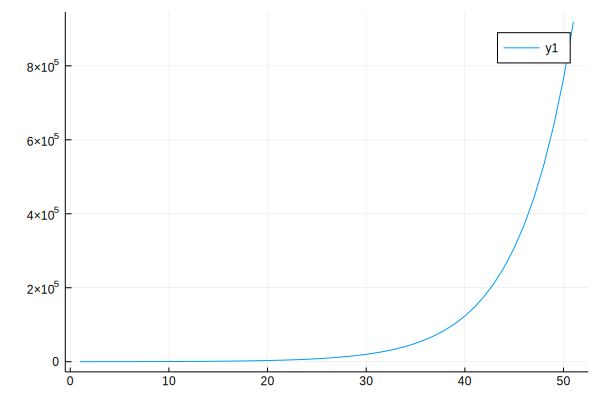

In [25]:
plot(samplingIR[1])

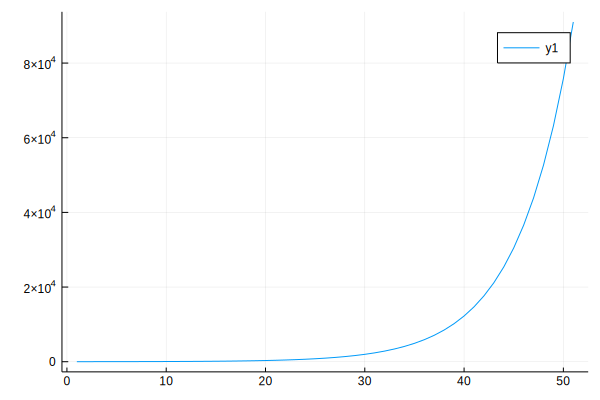

In [26]:
plot(resultIR[:DeltaAccumulator])

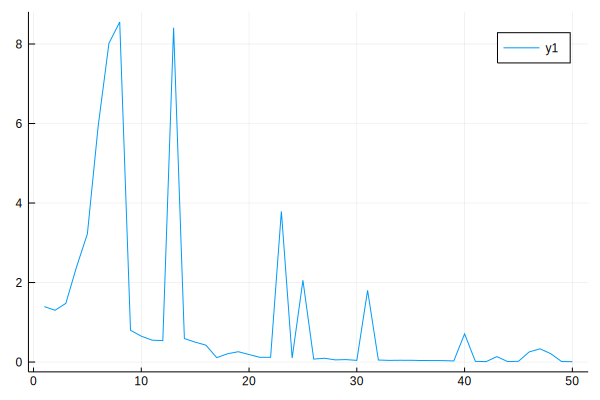

In [28]:
plot(resultIR[:NormStepAccumulator])

In [38]:
p = plot(resultBHHHshs[:Times], resultBHHHshs[:DistTo], label="BHHH sHs")
plot!(resultBHHHtv[:Times], resultBHHHtv[:DistTo], label="BHHH tv")
plot!(resultHEStv[:Times], resultHEStv[:DistTo], label="Hes tv")
plot!(resultIR[:Times], resultIR[:DistTo], label="IR")
plot!(resultAdam[:Times], resultAdam[:DistTo], label="Adam")

<!DOCTYPE html>
 
 
 Plots.jl

In [39]:
p = plot(resultBHHHshs[:Times], resultBHHHshs[:IterAccumulator], xlabel="time", ylabel = "Iter", label="BHHH sHs")
plot!(resultBHHHtv[:Times], resultBHHHtv[:IterAccumulator], label="BHHH tv")
plot!(resultHEStv[:Times], resultHEStv[:IterAccumulator], label="Hes tv")
plot!(resultIR[:Times], resultIR[:IterAccumulator], label="IR")
plot!(resultAdam[:Times], resultAdam[:IterAccumulator], label="Adam")

<!DOCTYPE html>
 
 
 Plots.jl

In [40]:
z_α = quantile(Normal(), 0.975)

1.9599639845400576

In [41]:
all_f = Amlet.Fs(paramHEStv[25], mo, sample=1:Nobs(mo))

fH = mean(all_f)
sigmaH = std(all_f, mean = fH, corrected = false)

lH = fH - z_α*sigmaH/sqrt(Nobs(mo))
sH = fH + z_α*sigmaH/sqrt(Nobs(mo))


LoadError: [91mBoundsError: attempt to access 21-element Array{Array{T,1} where T,1} at index [25][39m

In [42]:
Amlet.F(paramBHHHshs[230], mo, sample=1:Nobs(mo))

LoadError: [91mBoundsError: attempt to access 213-element Array{Array{T,1} where T,1} at index [230][39m

In [43]:
all_f = Amlet.Fs(paramBHHHshs[230], mo, sample=1:Nobs(mo))

fH = mean(all_f)
sigmaH = std(all_f, mean = fH, corrected = false)

lH = fH - z_α*sigmaH/sqrt(Nobs(mo))
# sH = fH + z_α*sigmaH/sqrt(Nobs(mo))

LoadError: [91mBoundsError: attempt to access 213-element Array{Array{T,1} where T,1} at index [230][39m